In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('water.csv')

In [4]:
data.drop(inplace = True, columns = [data.columns[0]])

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


## Visualize

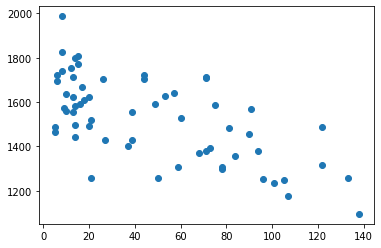

In [16]:
plt.scatter(data['hardness'], data['mortality'])

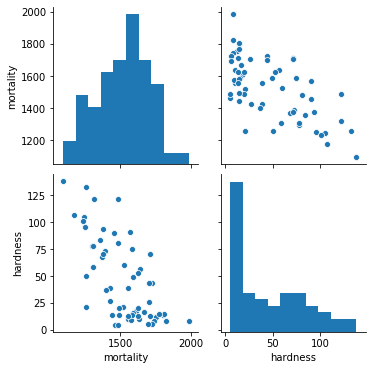

In [165]:
sns.pairplot(data)

In [31]:
data.corr(method = 'pearson').iloc[0, 1]

-0.6548486232042464

In [32]:
data.corr(method = 'spearman').iloc[0, 1]

-0.6316646189166502

In [33]:
data.corr(method = 'kendall').iloc[0, 1]

-0.45375281767829817

## Linear Regression

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [150]:
X = data[['hardness']]
y = data['mortality']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [152]:
lg = LinearRegression()

In [153]:
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
lg.score(X_test, y_test)

0.1268966664413429

In [155]:
lg.score(X_train, y_train)

0.48543227920728294

In [156]:
np.mean(y_train)

1520.4375

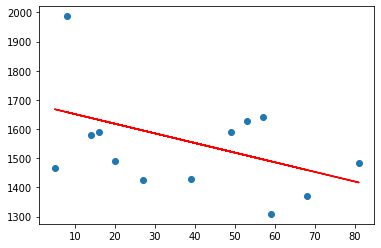

In [164]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lg.predict(X_test), c = 'r')

In [168]:
# Альтернативный способ из statsmodel

In [169]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [171]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [172]:
X_const.shape

(42, 2)

In [173]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [174]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           7.83e-06
Time:                        00:51:45   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [175]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


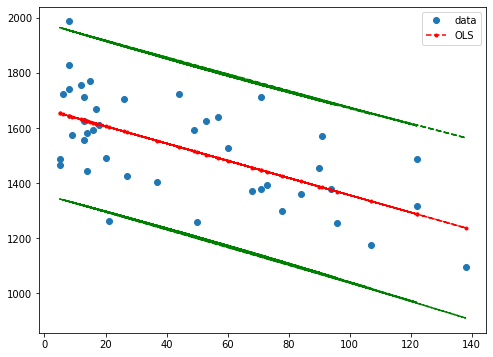

In [176]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

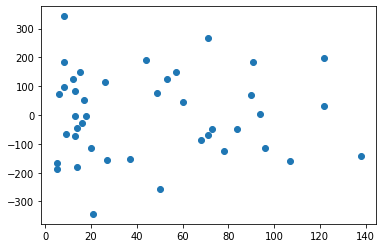

In [177]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

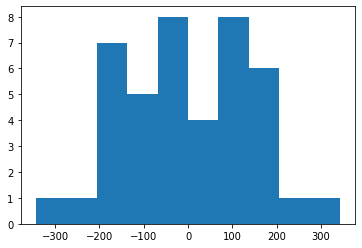

In [178]:
plt.hist(results.resid)